## Importing necessary modules

In [2]:
import pandas as pd
import os

In [3]:
files = os.listdir("Sales_Data")
files

['Sales_October_2019.csv',
 'Sales_December_2019.csv',
 'Sales_May_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_August_2019.csv',
 'Sales_March_2019.csv',
 'Sales_June_2019.csv',
 '.ipynb_checkpoints',
 'Sales_February_2019.csv',
 'Sales_April_2019.csv',
 'Sales_November_2019.csv',
 'Sales_September_2019.csv']

In [4]:
df = pd.DataFrame()

In [5]:
for file in files:
    if not file.endswith(".csv"):
        continue
    n_df = pd.read_csv(f"Sales_Data/{file}")
    df = pd.concat([df, n_df])

In [6]:
df.to_csv("all_data.csv")

## Read from the updated dataset

In [7]:
df = pd.read_csv("all_data.csv", index_col=0)

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


### adding new columns for better analysis

In [9]:
df['Month'] = df['Order Date'].str[:2]

In [10]:
nan_rows = df.isna().any(axis=1)

In [11]:
df.dropna(inplace=True)
df = df[df.Month != "Or"]

In [12]:
df.Month.astype("int32")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10


In [13]:
df['Quantity Ordered'] = pd.to_numeric(df["Quantity Ordered"])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [14]:
df['Sales'] =  df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99


## q1. What was the best month for sales and how much money was earned?

In [15]:
best_month_data = df.groupby('Month')[['Sales','Quantity Ordered']].sum()
best_month_data

,Sales,Quantity Ordered
Month,,
01,1822256.73,10903
02,2202022.42,13449
03,2807100.38,17005
04,3390670.24,20558
05,3152606.75,18667
06,2577802.26,15253
07,2647775.76,16072
08,2244467.88,13448
09,2097560.13,13109


In [16]:
best_month = best_month_data['Sales'].idxmax()
most_sales = best_month_data.Sales.max()


In [17]:
print(f"Best month was {best_month} with {most_sales} sales")

Best month was 12 with 4613443.34 sales


### visulalization

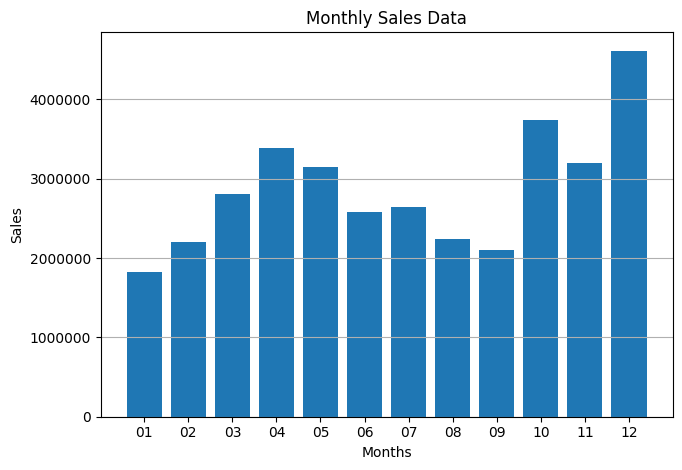

In [18]:
import matplotlib.pyplot as plt
plt.bar(best_month_data.index, best_month_data['Sales']) 
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Monthly Sales Data")
plt.grid(axis='y') 
plt.tight_layout()
plt.gca().yaxis.get_major_formatter().set_scientific(False) 
plt.show()

## q2. What city has the highest number of sales?

In [19]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,5.98
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,149.99
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99


In [20]:
split_address = df['Purchase Address'].str.split(",")

In [21]:
df['City'] = split_address.str[1] + ','+ split_address.str[2]

In [22]:
city_sales = df.groupby('City')['Sales'].sum()
best_city, m_sales_c  = city_sales.idxmax() , city_sales.max()
city_sales

City
Atlanta, GA 30301          2795498.58
Austin, TX 73301           1819581.75
Boston, MA 02215           3661642.01
Dallas, TX 75001           2767975.40
Los Angeles, CA 90001      5452570.80
New York City, NY 10001    4664317.43
Portland, ME 04101          449758.27
Portland, OR 97035         1870732.34
San Francisco, CA 94016    8262203.91
Seattle, WA 98101          2747755.48
Name: Sales, dtype: float64

In [23]:
print(f"The best city is {best_city} with {m_sales_c} sales")

The best city is  San Francisco, CA 94016 with 8262203.91 sales


### visualization

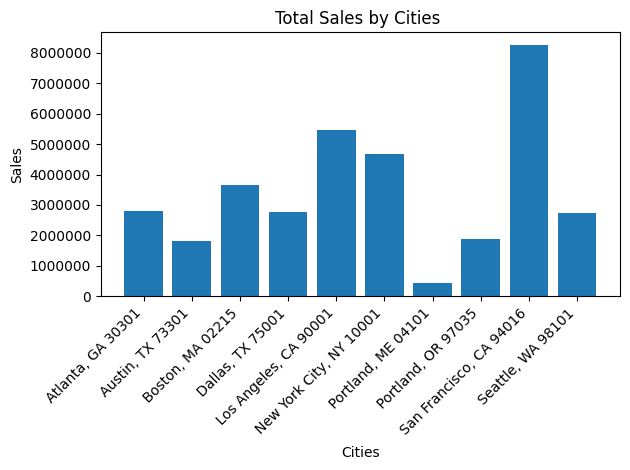

In [24]:
plt.bar(city_sales.index, city_sales.values )
plt.xticks(range(len(city_sales)), city_sales.index, rotation=45, ha='right')
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Cities")
plt.ylabel("Sales")
plt.title("Total Sales by Cities ")
plt.tight_layout()
plt.show()

## q3. What is the best time for advertisement?

In [28]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%y %H:%M")
df['Time'] = df['Order Date'].dt.time
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,"Dallas, TX 75001",10:56:00
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,"Los Angeles, CA 90001",17:26:00
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,"New York City, NY 10001",17:20:00
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,"New York City, NY 10001",22:26:00
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,"Los Angeles, CA 90001",16:10:00


In [47]:
time_sale = df.groupby(df['Time'].apply(lambda x: x.hour))['Sales'].sum()
time_sale.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int64', name='Time')

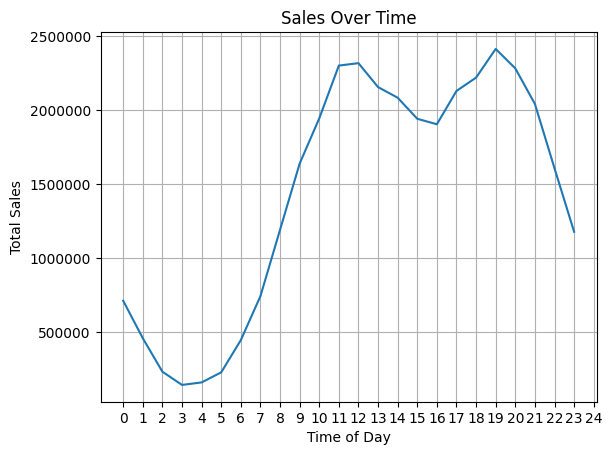

In [50]:
# new_dt = [str(x) for x in time_sale.index]
plt.plot(time_sale.index, time_sale)
plt.title("Sales Over Time")
plt.xlabel("Time of Day")
plt.ylabel("Total Sales")
plt.xticks(range(0,25))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.grid(True)
plt.show()

 I would recommend just before the peak hours.

## q4. What Product are sold the most?

In [84]:
product_data = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)[:10]

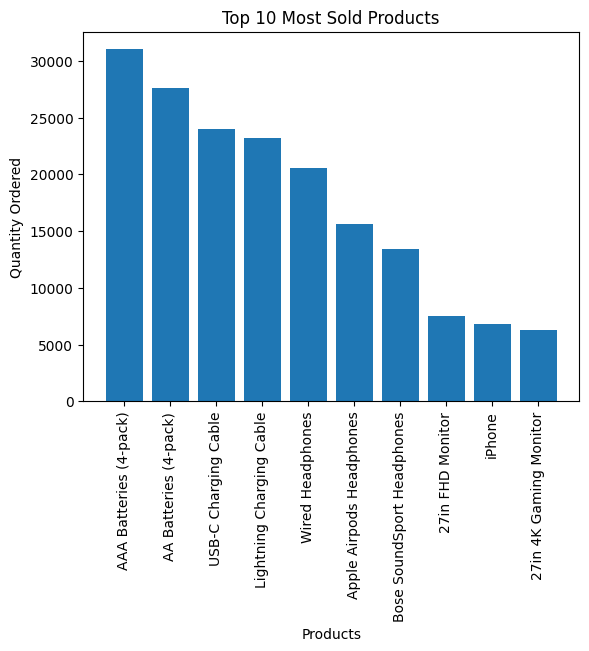

In [89]:
plt.bar(product_data.index , product_data)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation="vertical")
plt.title("Top 10 Most Sold Products")
plt.show()

## q5. Show Frequently bought together products.

In [90]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10,379.99,"Dallas, TX 75001",10:56:00
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10,389.99,"Los Angeles, CA 90001",17:26:00
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10,5.98,"New York City, NY 10001",17:20:00
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10,149.99,"New York City, NY 10001",22:26:00
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10,11.99,"Los Angeles, CA 90001",16:10:00


In [109]:
order_id_group = df.groupby('Order ID')['Product'].agg(list)
order_id_group

Order ID
141234                        [iPhone]
141235      [Lightning Charging Cable]
141236              [Wired Headphones]
141237              [27in FHD Monitor]
141238              [Wired Headphones]
                      ...             
319666      [Lightning Charging Cable]
319667         [AA Batteries (4-pack)]
319668               [Vareebadd Phone]
319669              [Wired Headphones]
319670    [Bose SoundSport Headphones]
Name: Product, Length: 178437, dtype: object

In [117]:
def relation(product):
    counter = {}
    for order in order_id_group:
        if product in order:
            for item in order:
                if item != product:
                    counter[item] = counter.get(item , 0) + 1
    return counter
## note: it may seem like relation function is time consuming but since the items in orders are so small. it still is O(n) where n is length of order_id_group.
freq_bought = {}
for product in df['Product'].unique():
    connections = relation(product)
    freq_bought[product] = connections

freq_bought

             

{'34in Ultrawide Monitor': {'Lightning Charging Cable': 33,
  'Wired Headphones': 28,
  'Flatscreen TV': 8,
  'AA Batteries (4-pack)': 32,
  'AAA Batteries (4-pack)': 25,
  'USB-C Charging Cable': 26,
  'Apple Airpods Headphones': 14,
  '27in FHD Monitor': 10,
  'Bose SoundSport Headphones': 17,
  'Google Phone': 5,
  '27in 4K Gaming Monitor': 6,
  'Macbook Pro Laptop': 7,
  'iPhone': 13,
  'Vareebadd Phone': 4,
  'LG Washing Machine': 1,
  '20in Monitor': 2,
  'ThinkPad Laptop': 4},
 '27in 4K Gaming Monitor': {'AAA Batteries (4-pack)': 30,
  'AA Batteries (4-pack)': 26,
  'iPhone': 9,
  '27in FHD Monitor': 8,
  'USB-C Charging Cable': 23,
  'Bose SoundSport Headphones': 19,
  'Lightning Charging Cable': 34,
  'Macbook Pro Laptop': 13,
  'Google Phone': 6,
  'Wired Headphones': 29,
  'Vareebadd Phone': 3,
  '20in Monitor': 2,
  'LG Washing Machine': 1,
  'Apple Airpods Headphones': 22,
  'Flatscreen TV': 5,
  '34in Ultrawide Monitor': 6,
  'LG Dryer': 2,
  'ThinkPad Laptop': 5},
 'AAA 

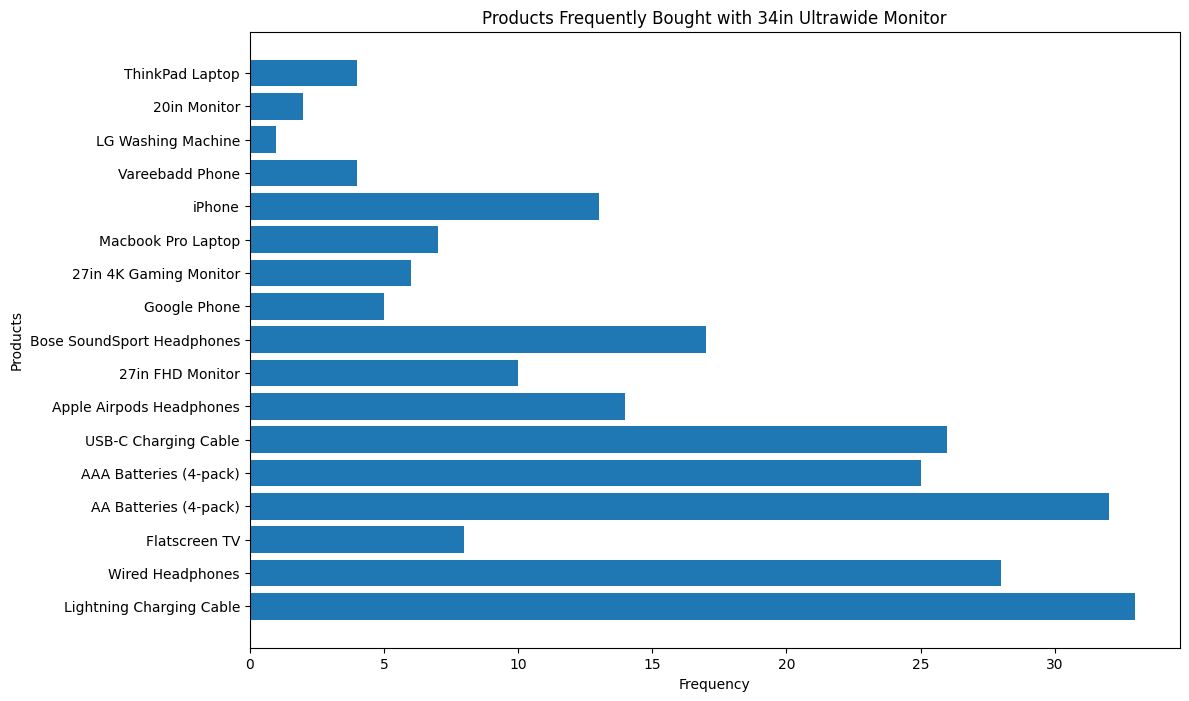

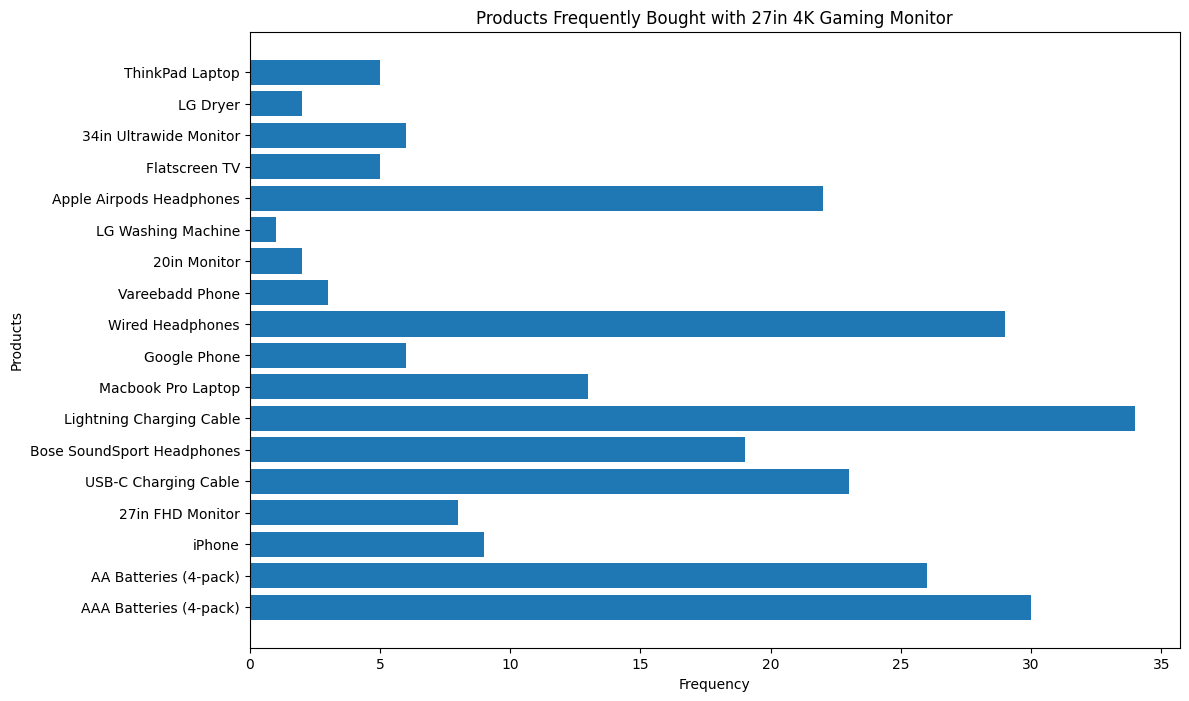

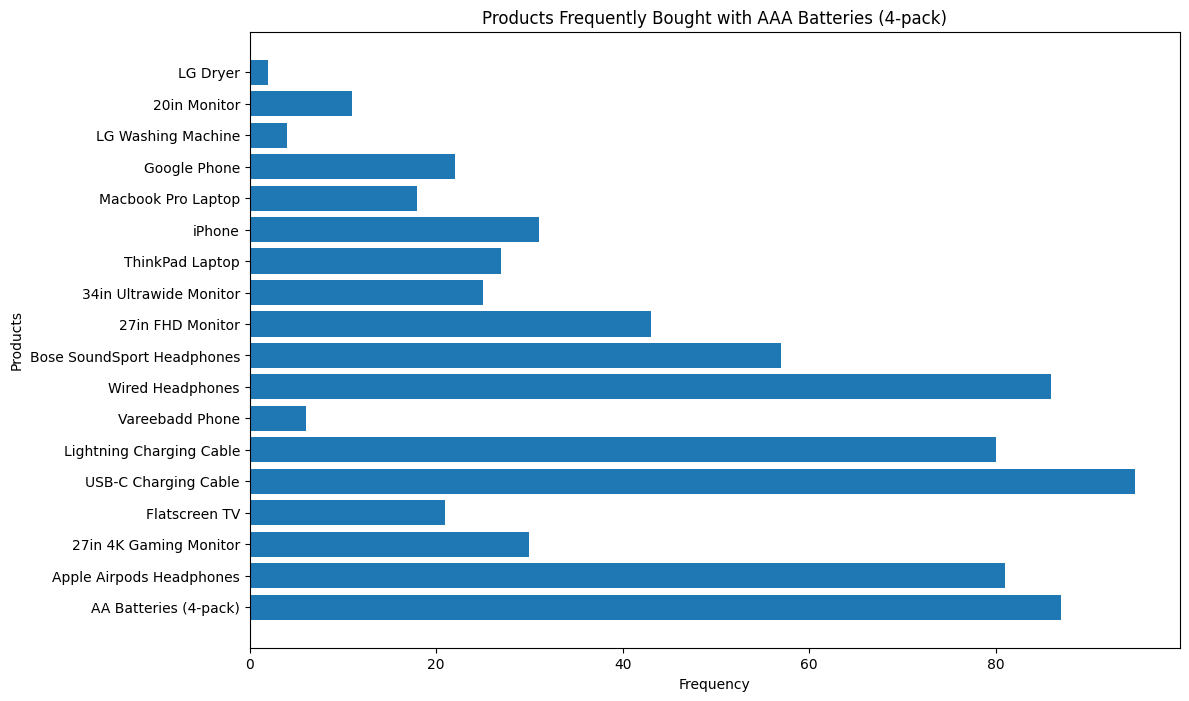

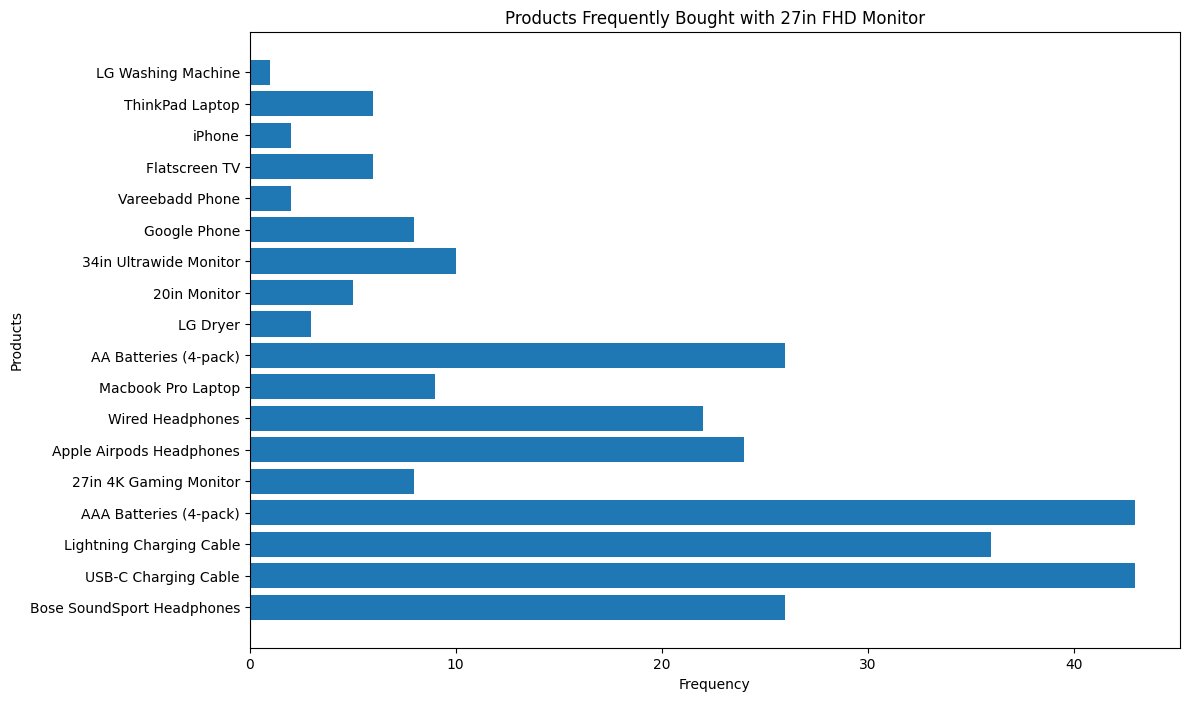

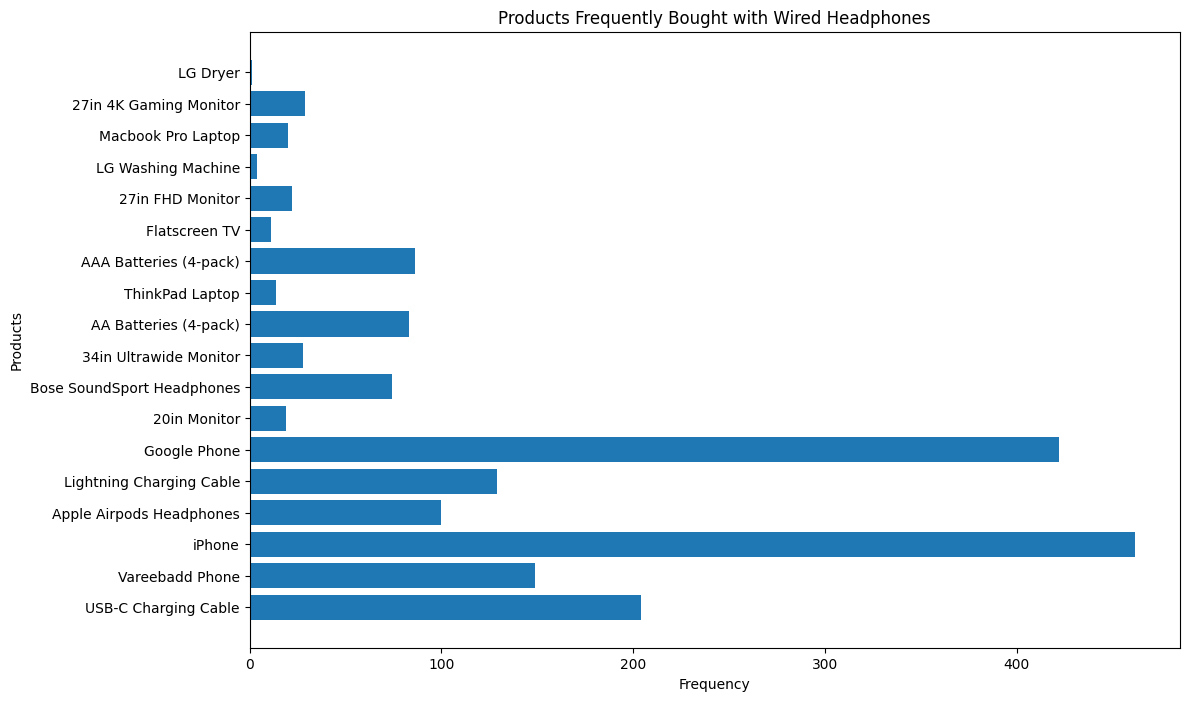

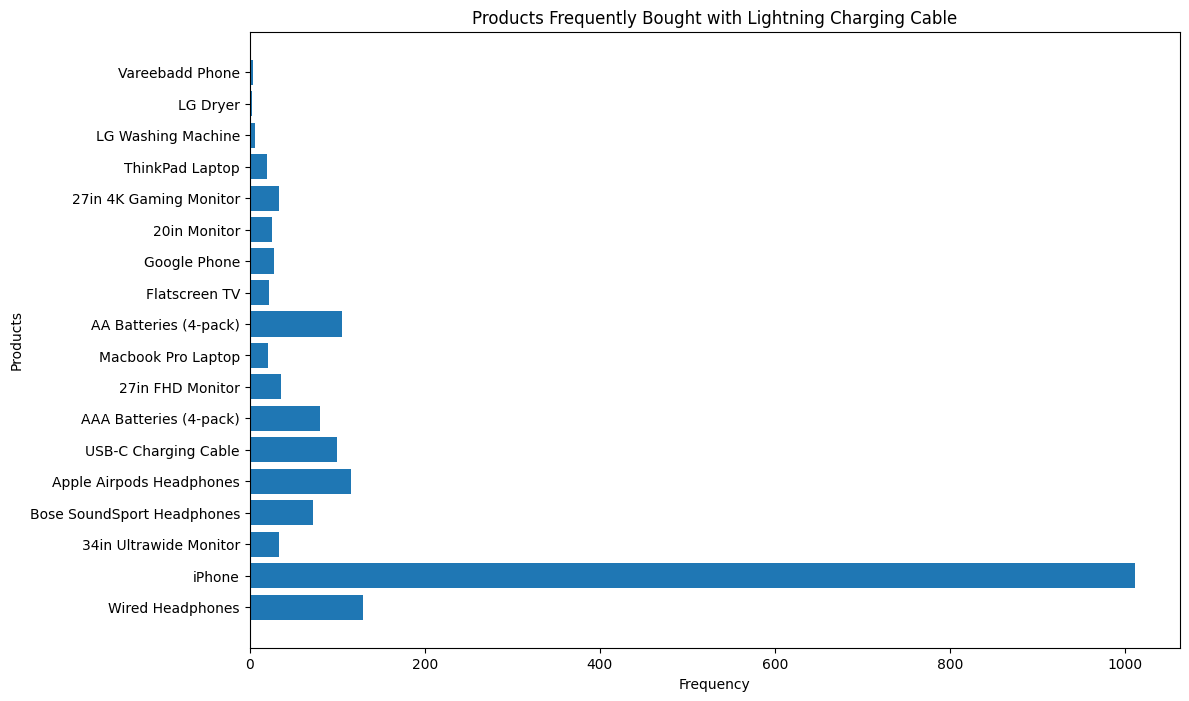

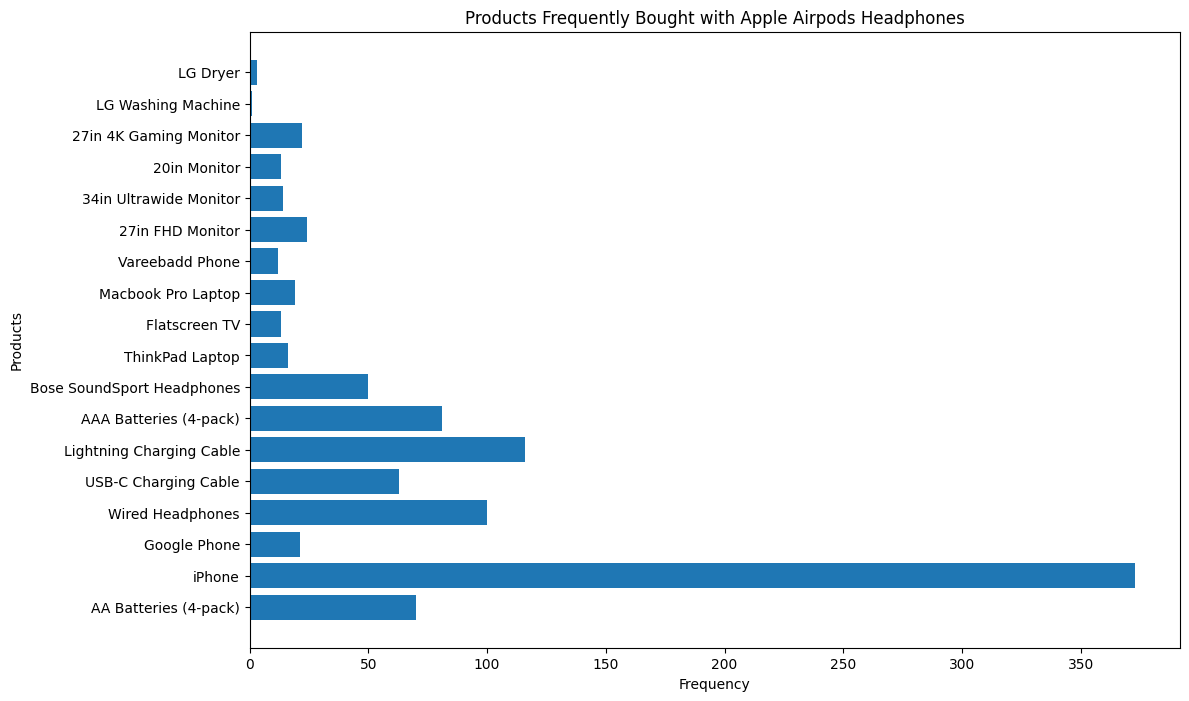

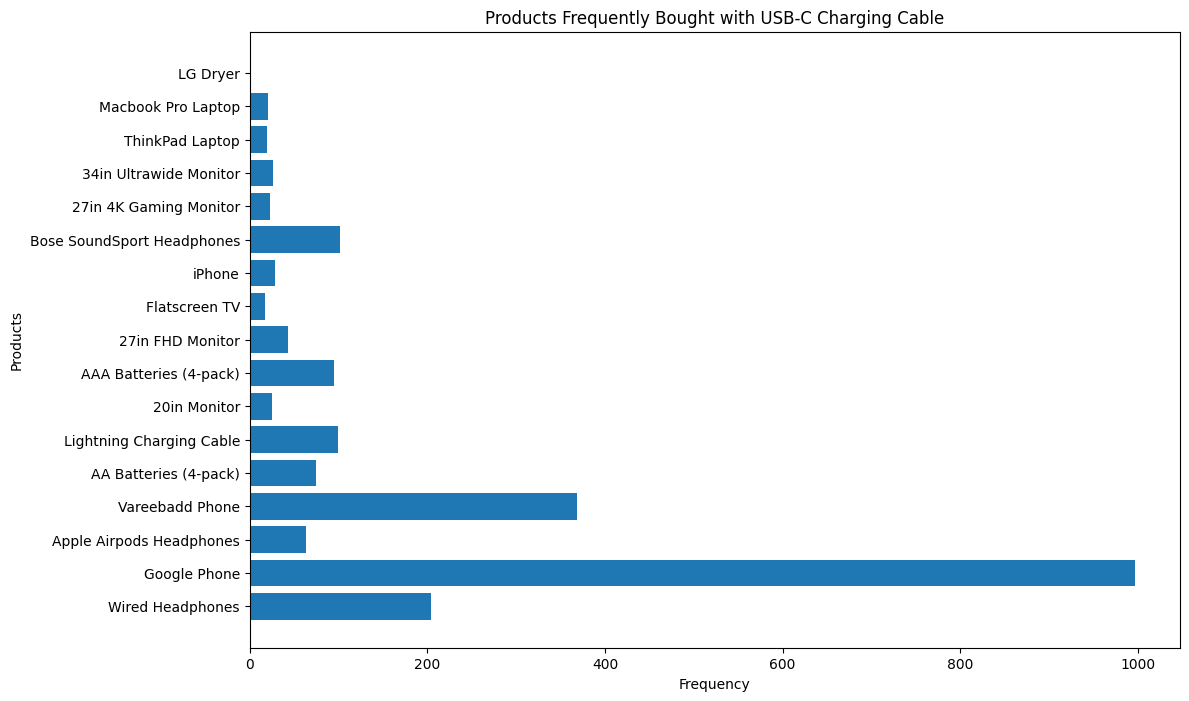

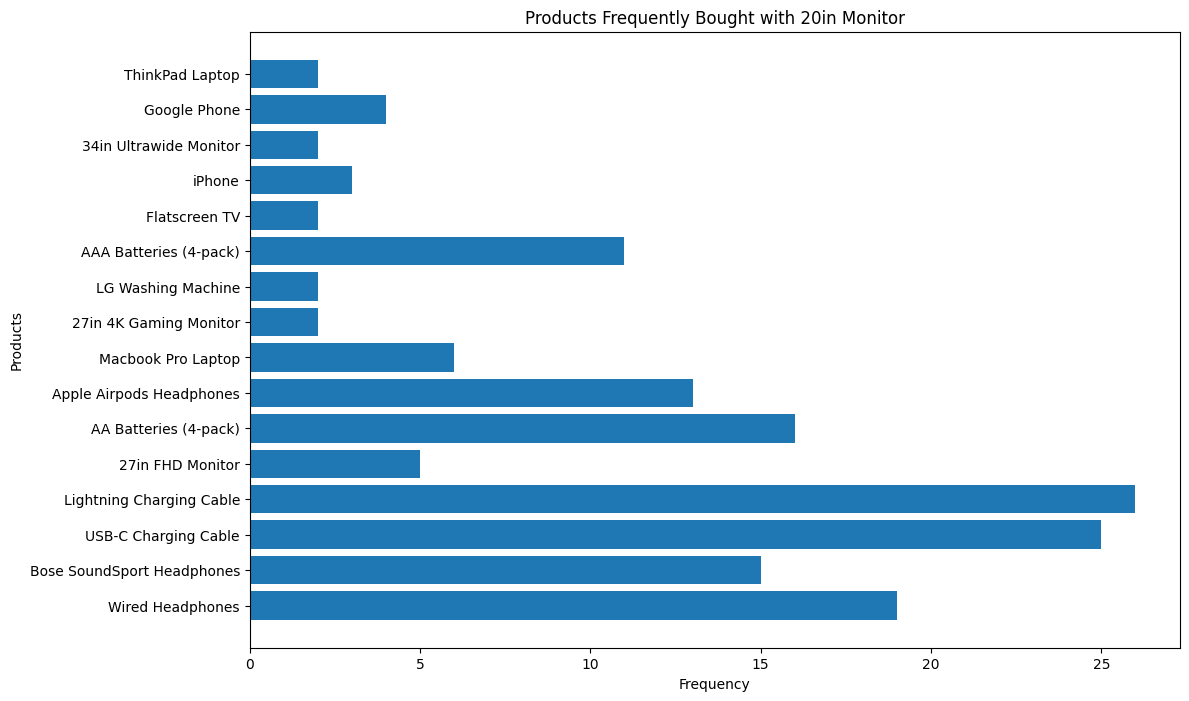

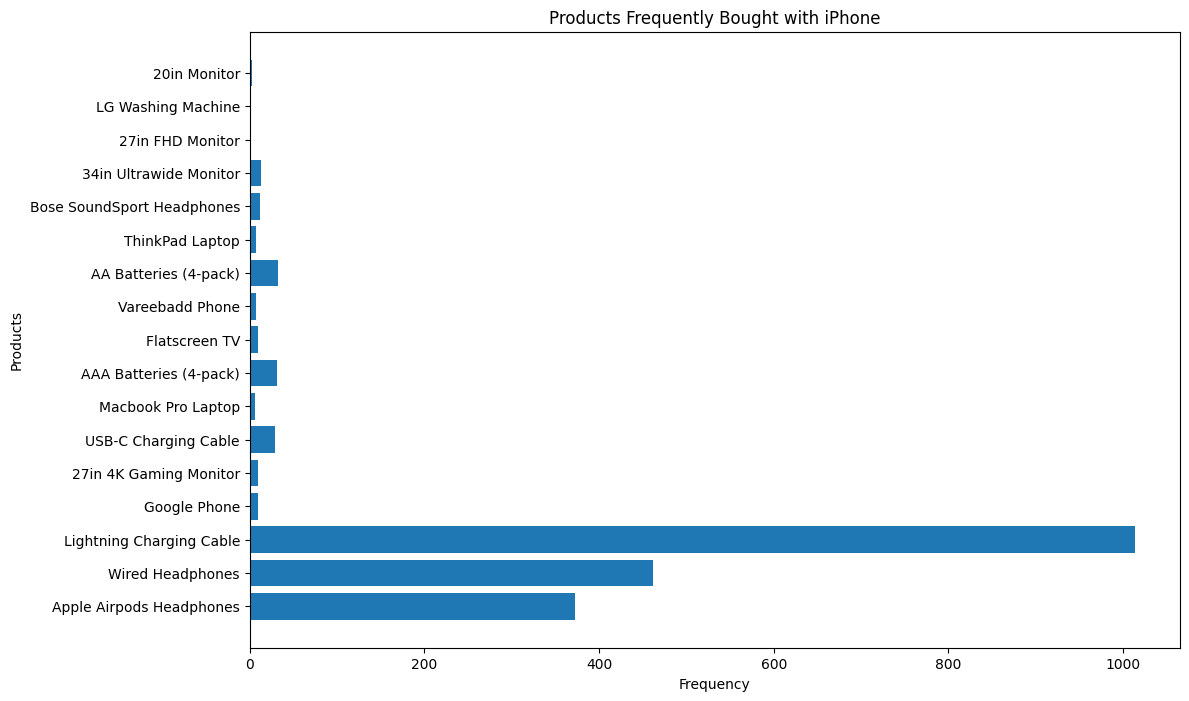

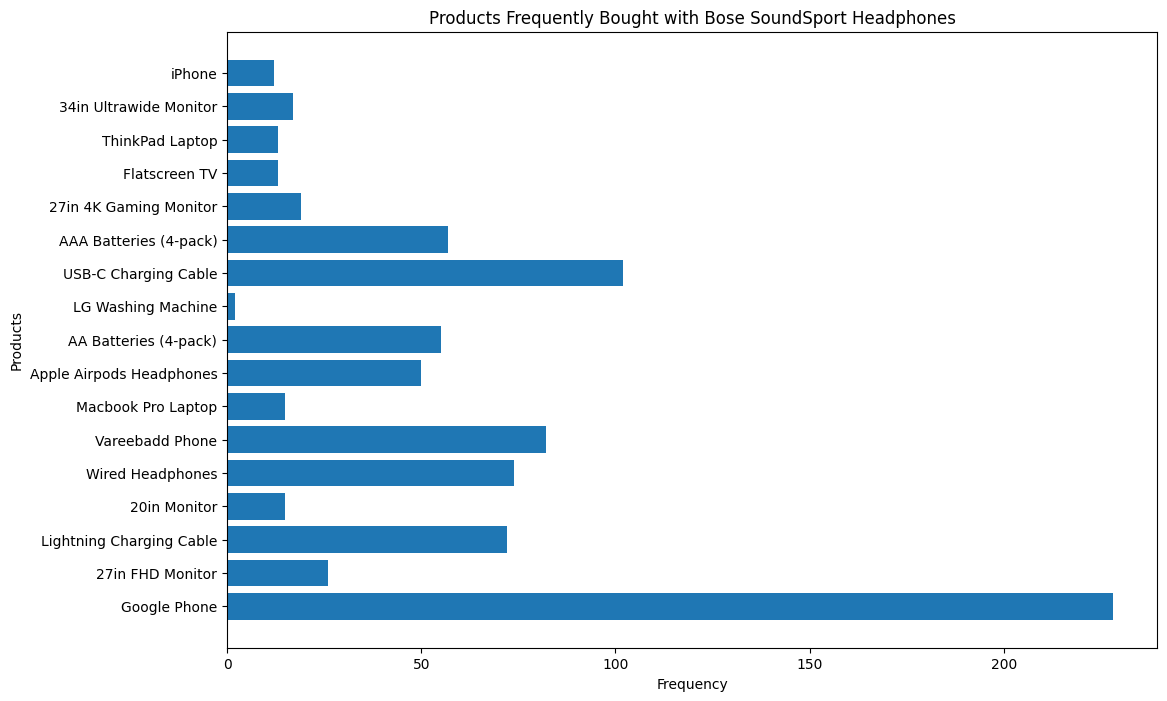

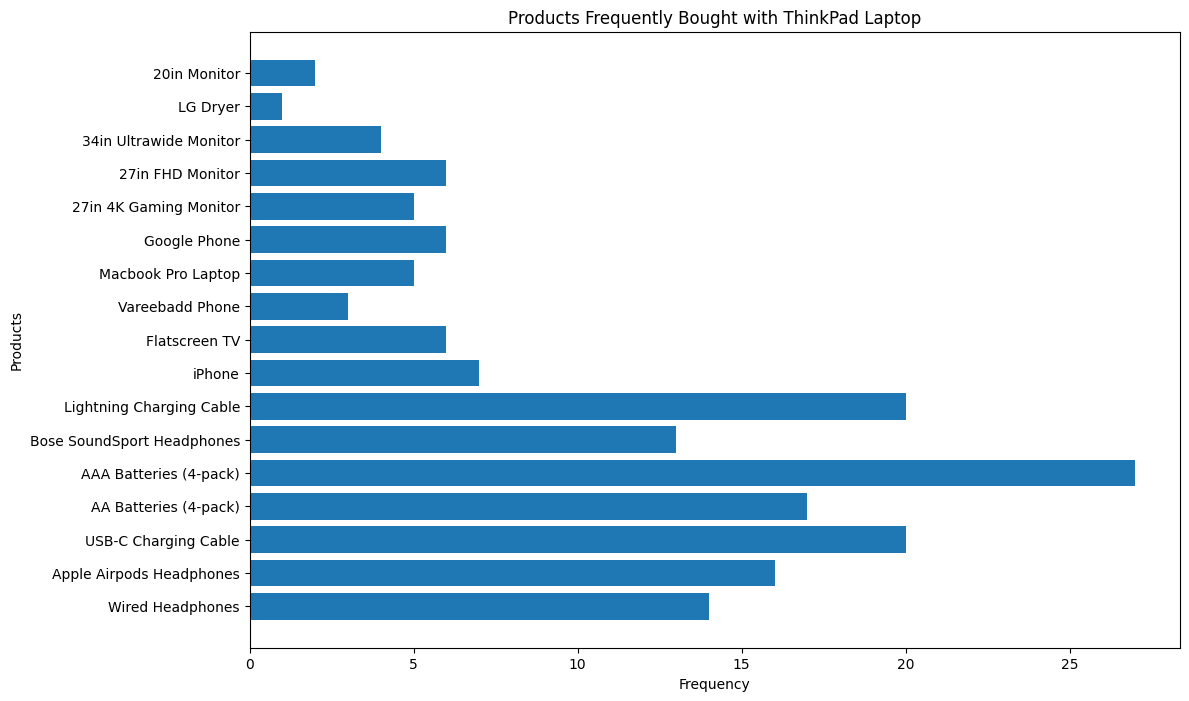

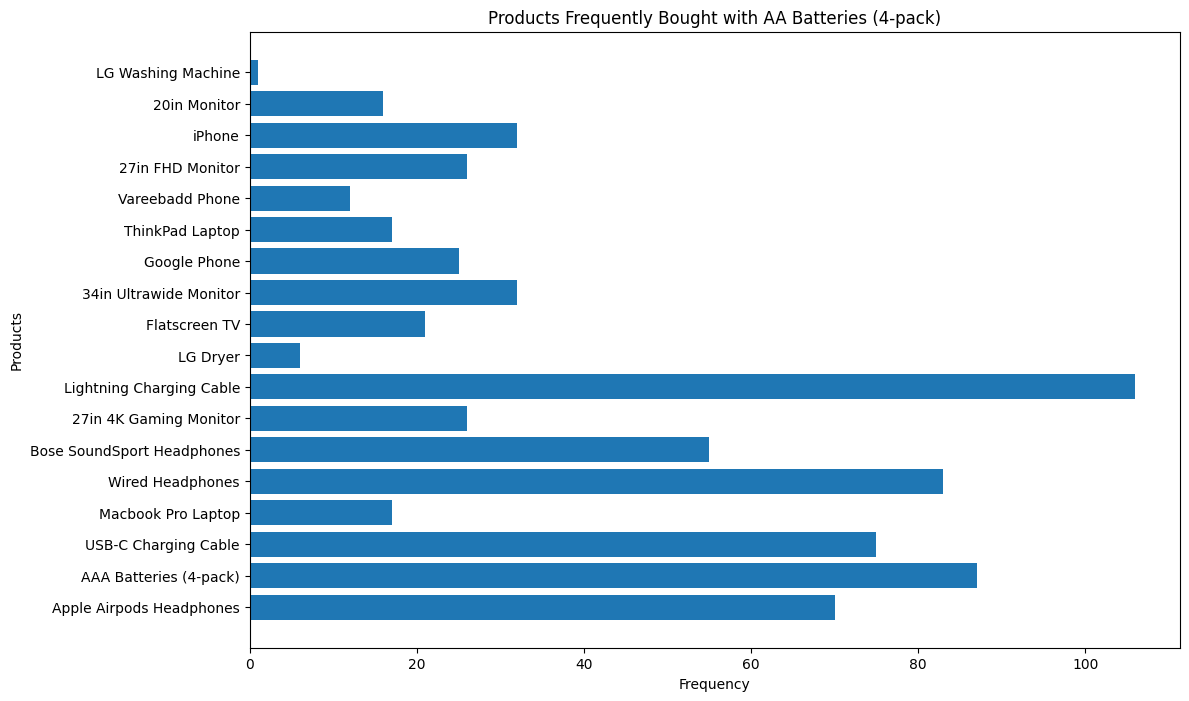

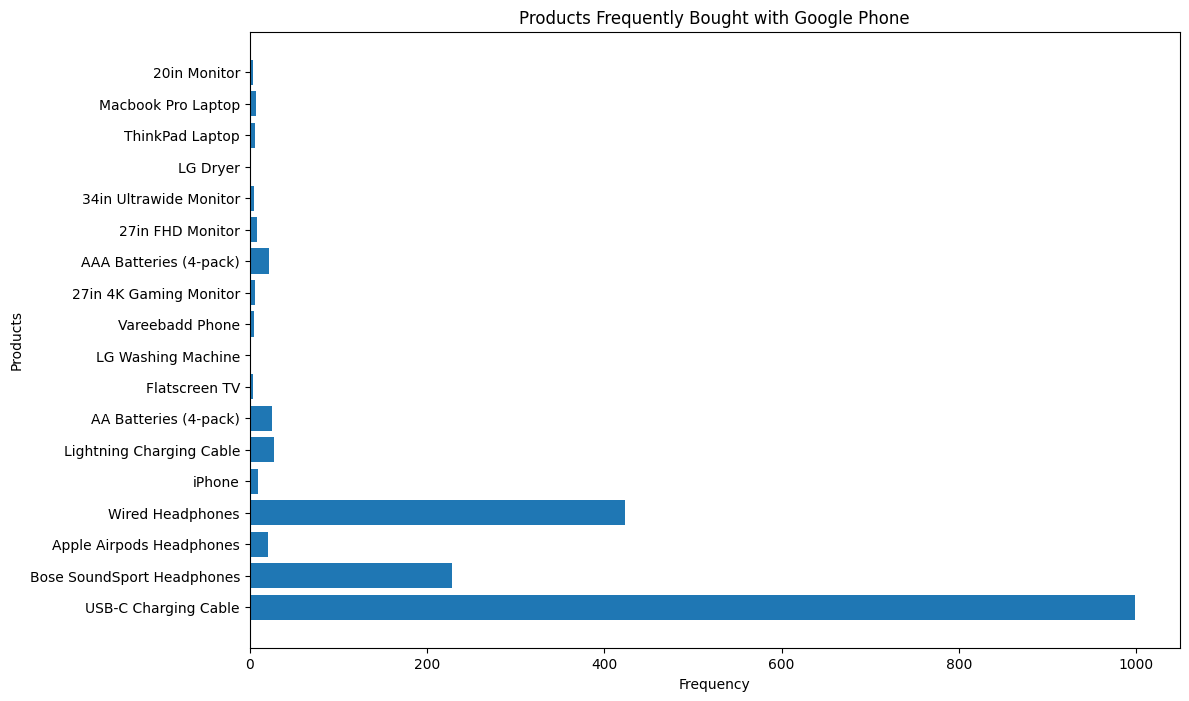

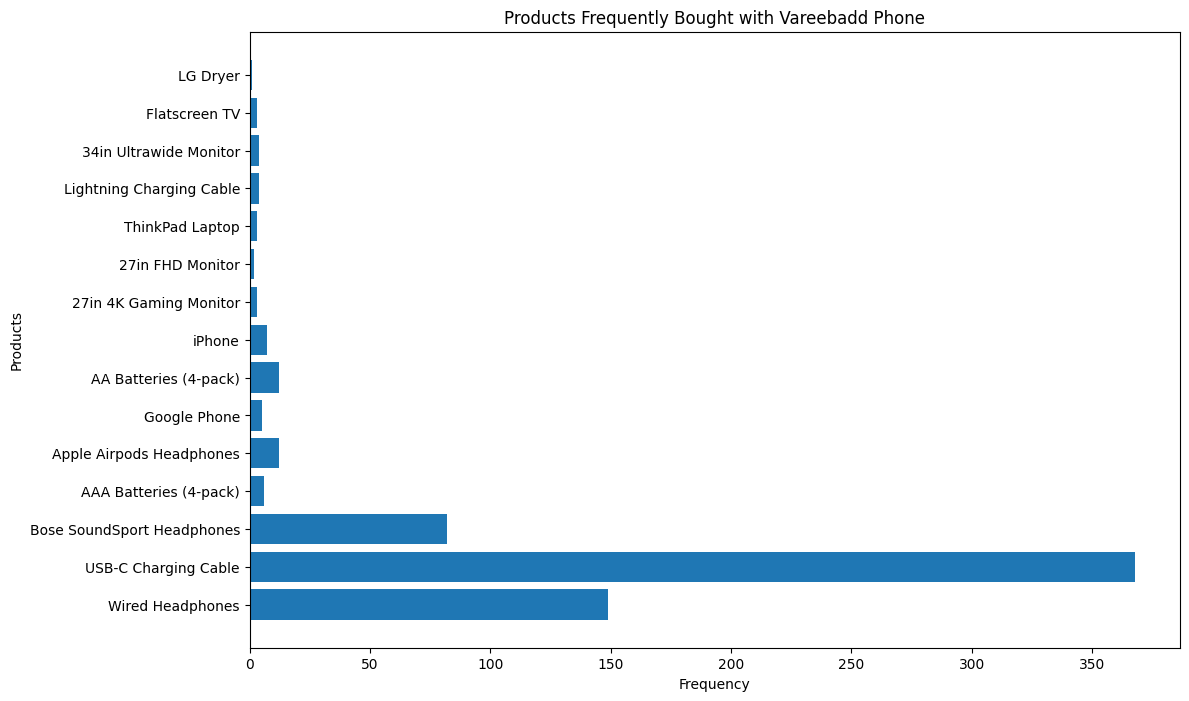

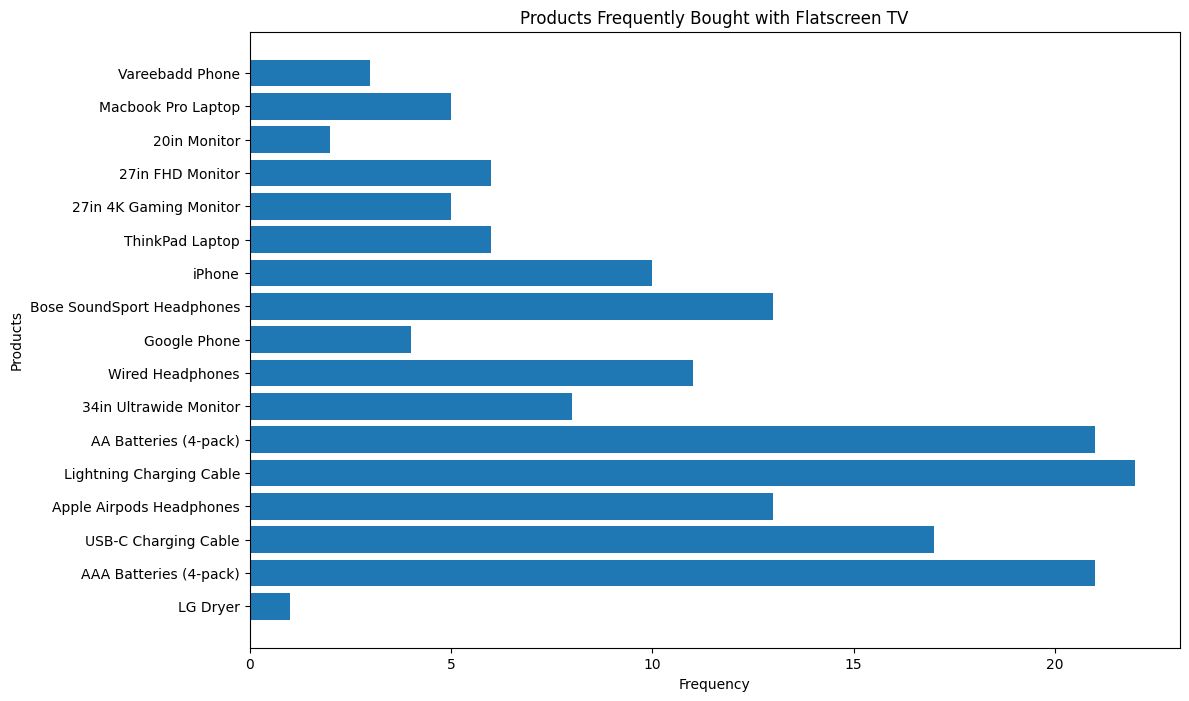

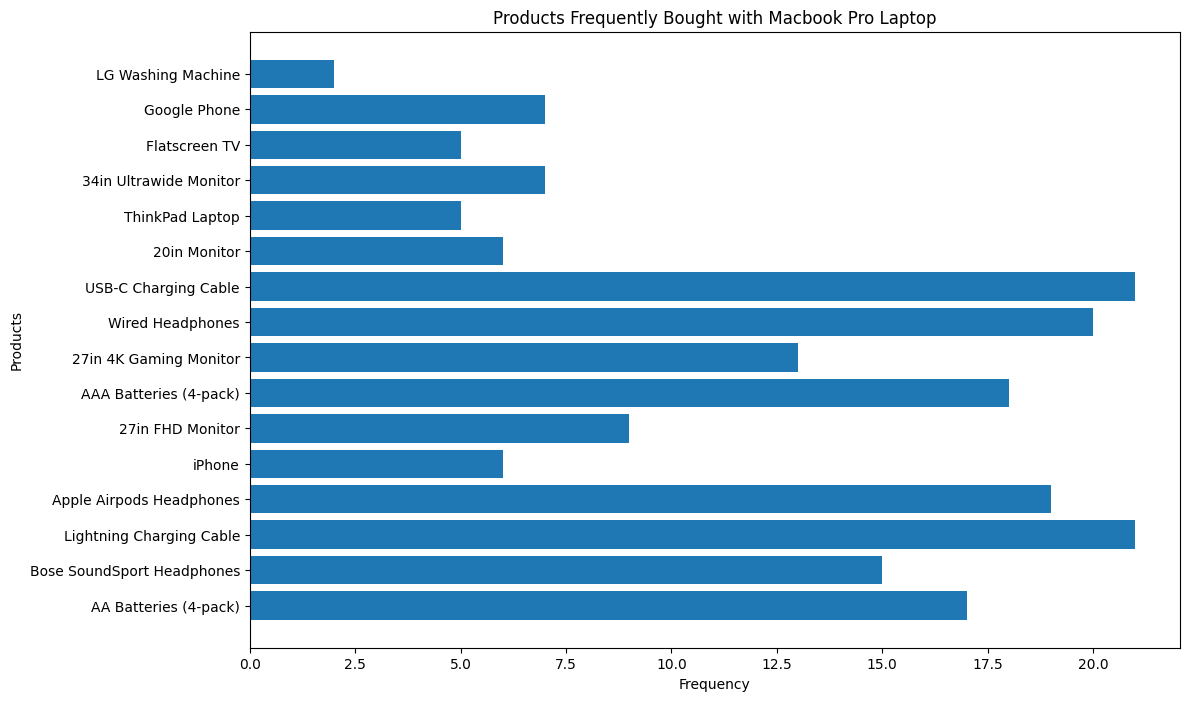

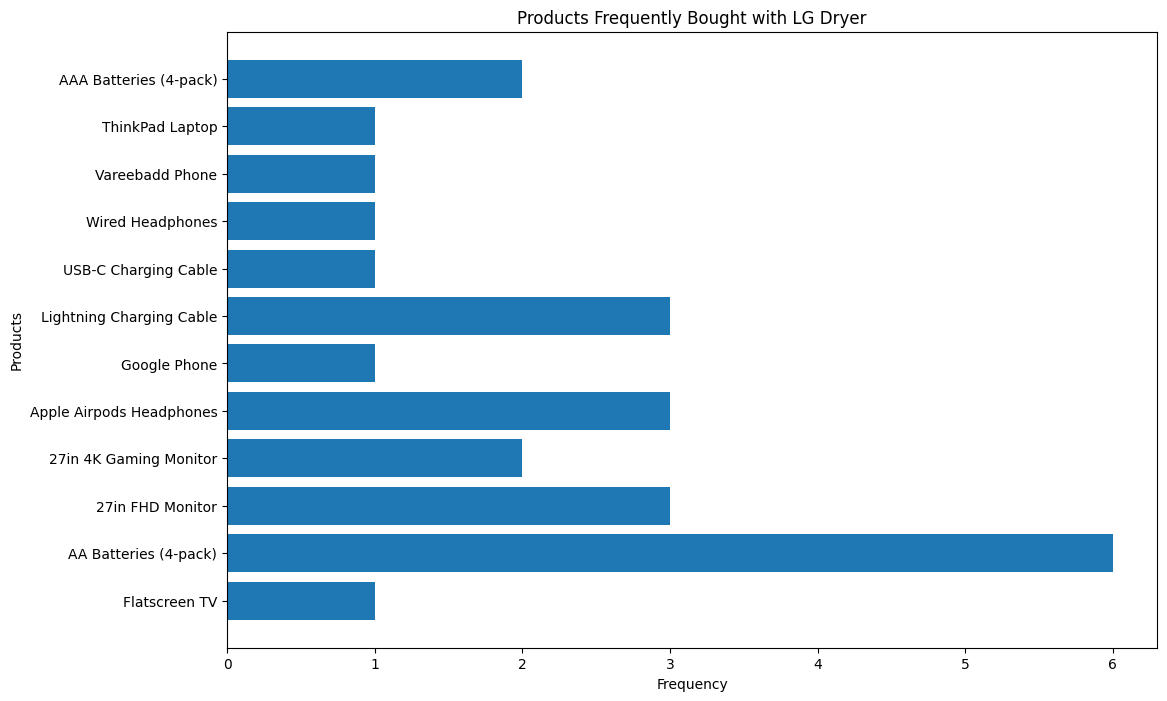

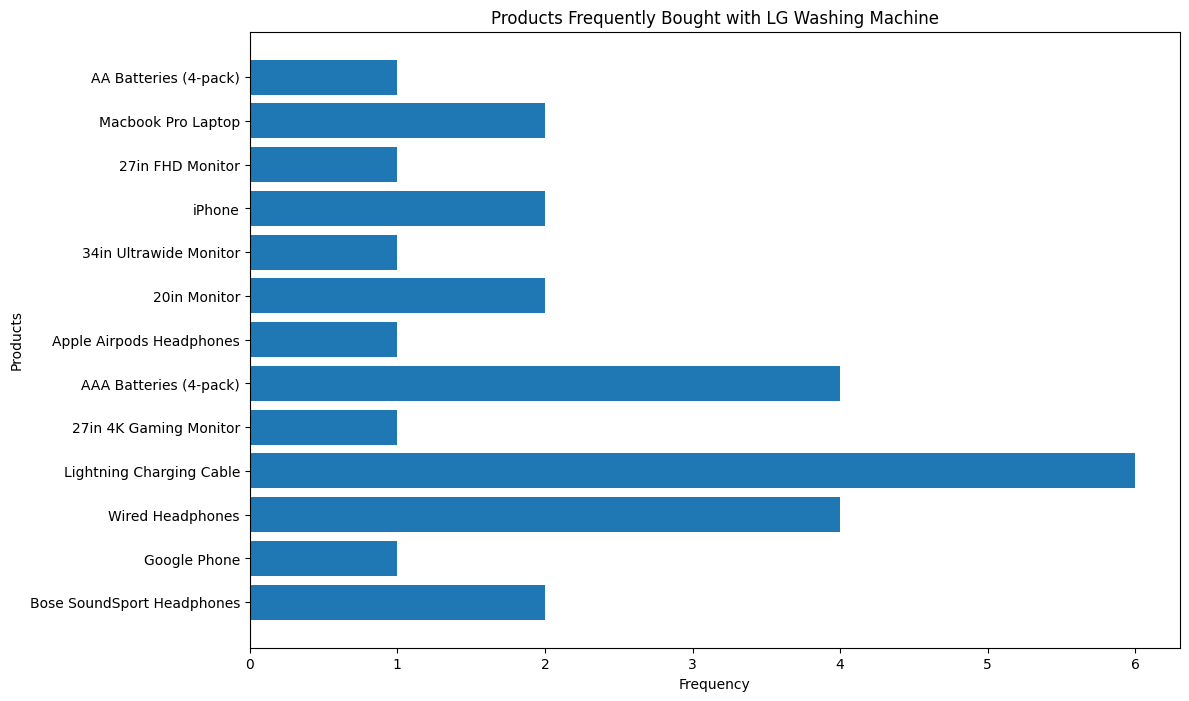

In [134]:
for prod in freq_bought:
    plt.figure(figsize=(12, 8))
    plt.barh(freq_bought[prod].keys(),
            freq_bought[prod].values())
    plt.xlabel('Frequency')
    plt.ylabel('Products')
    plt.title(f'Products Frequently Bought with {prod}')
    plt.show()

